# Video Game Sales By G26
This dataset contains a list of video games with sales greater than 100,000 copies. The fields include a ranking of overall sales, the name of the video game, the platform it was released on, the year it was released, genre of the game, publisher of the game, North American sales, European sales, Japanese sales, sales from the rest of the world and global sales, all of which are counted in terms in millions.

This dataset includes categorical data such as the name of the video game, the video game’s platform, genre, and publisher as well as numerical data such as its sales across the globe and its total global sales.




## Collection Process
The dataset used was collected using a scraping script obtained from [Github](https://github.com/GregorUT/vgchartzScrape), which was then published on [Kaggle](https://www.kaggle.com/gregorut/videogamesales) where we obtained the dataset. Due to how the data from vgchartz is gathered there may be some discrepancies to the actual sales of the game. The dataset shows how much a game has sold for a specific platform, games with several platforms appear in the dataset multiple times.

### Data Implications

### Imported Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Video Game Data
Each row in the dataset represents a particular video game released on or before the year 2020. Each column represents There are a total of 16,598 observations in the dataset and 11 variables. The dataset is composed of only a single csv file hence no merging is needed.

In [2]:
games = pd.read_csv('vgsales.csv')

If the csv file is viewed in Excel. One can see the dataset contains 16,598 observations and 11 variables. The following are the descriptions for each variable.
- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
games.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [5]:
#Rank is not equal to Name since there are games that are released in different Platforms.
games.nunique(axis = 0)

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

### Cleaning of Dataset

In [6]:
games.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

Year and Publisher have null values and only contains a small portion of the dataset so can be safely dropped.

In [7]:
null = games.columns[games.isnull().any()].tolist()
games[null].isnull().sum()

Year         271
Publisher     58
dtype: int64

There is a Publisher "Unknown" which are invalid values.

In [8]:
games['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [9]:
(games['Publisher']=='Unknown').sum()

203

In [10]:
games = games[games.Publisher != 'Unknown']


In [11]:
(games['Publisher']=='Unknown').sum()

0

In [12]:
games = games.dropna(subset=['Year','Publisher'])

In [13]:
games.isnull().any()

Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [14]:
duplicate = games.duplicated()
print("Number of duplicates:" + str(duplicate.sum()))

Number of duplicates:0


### End of Cleaning

# IMPORTANT ACCOMPANY EACH EDA QUESTION WITH STATISTICAL SUMMARY (E.G) ACTUAL NUMBERS AND NOT JUST VISUALIZATION


## EDA questions
1. Best performing platform of all time based on global sales
1. Trend of Global Sales and Regional Sales Throughout the years
1. Comparing the impact of each region's sales to the global sales

In [15]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### EDA Question 1:

In [128]:
games["Platform"].value_counts().sort_values(ascending = False)

PS2     2124
DS      2109
PS3     1294
Wii     1278
X360    1230
PSP     1190
PS      1187
PC       919
XB       803
GBA      780
GC       541
3DS      494
PSV      404
PS4      335
N64      316
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

#### Short Analysis
It Appears that PS2 has the largest amount of games in the dataset, While PCFX only having one game.

Text(0.5, 1.0, 'Total of Global Sales')

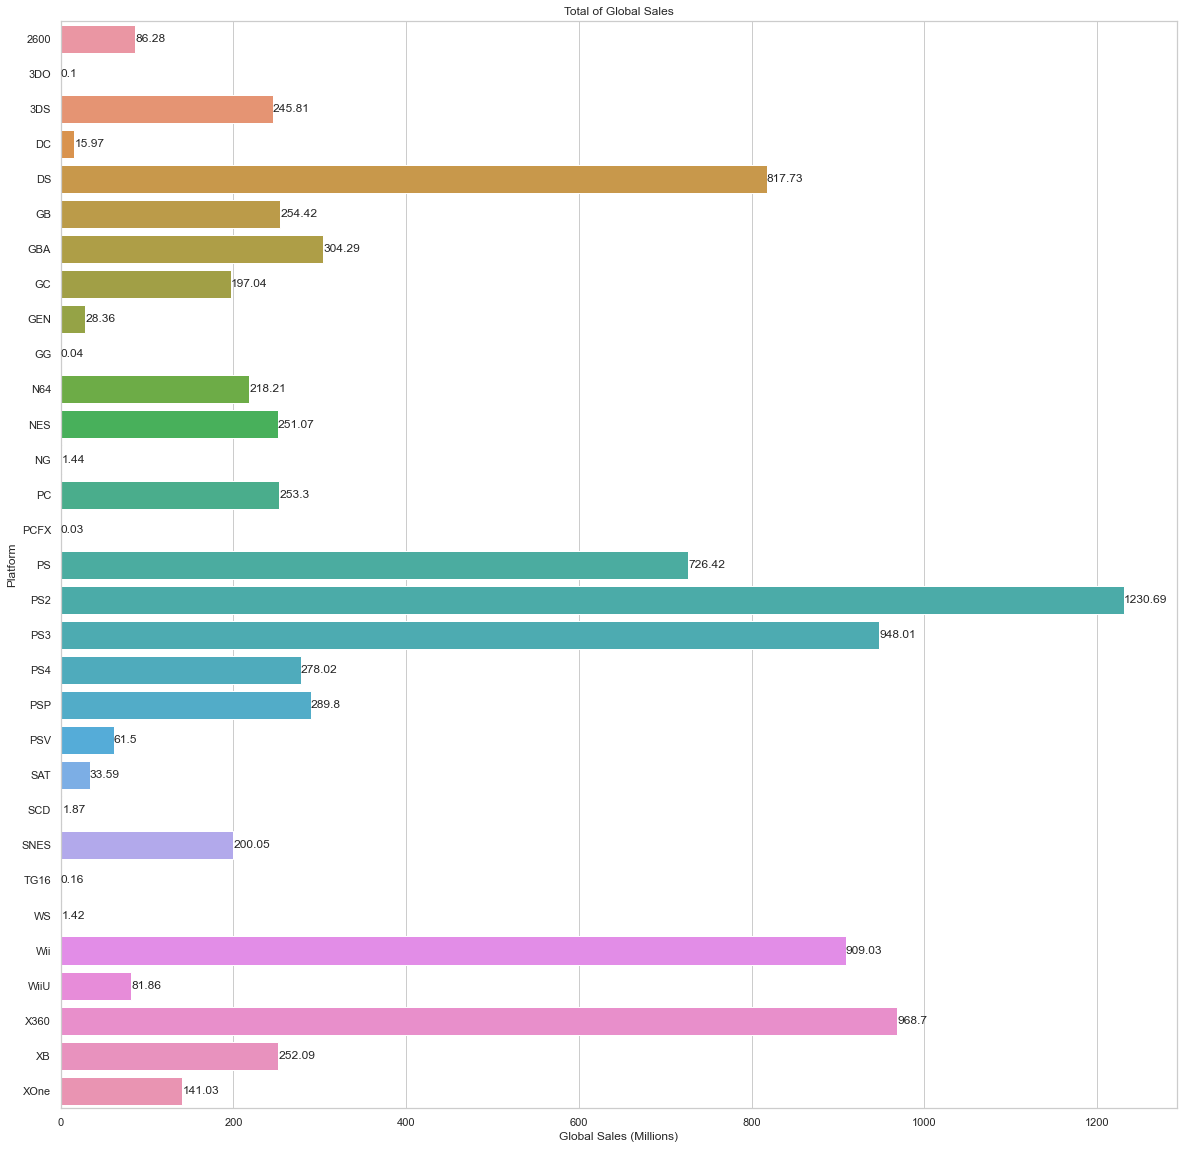

In [115]:
games_temp = games.groupby(games.Platform)["Global_Sales"].sum()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,20)) 
ax = sns.barplot(y=games_temp.index,x=games_temp.values)
ax.bar_label(ax.containers[0])
ax.set_xlabel("Global Sales (Millions)")
ax.set_title("Total of Global Sales")


In [125]:
games.groupby("Platform")["Global_Sales"].sum().sort_values(ascending = False)

Platform
PS2     1230.69
X360     968.70
PS3      948.01
Wii      909.03
DS       817.73
PS       726.42
GBA      304.29
PSP      289.80
PS4      278.02
GB       254.42
PC       253.30
XB       252.09
NES      251.07
3DS      245.81
N64      218.21
SNES     200.05
GC       197.04
XOne     141.03
2600      86.28
WiiU      81.86
PSV       61.50
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

#### Analysis
It appears that PS2 has the largest amount of sales despite being an younger platform compared to other platforms that are older and have also been well received from the market. This may be due it being one of the first platforms allowing "couch-play" as compared to its predecessors.

Text(0.5, 1.0, 'Average of Global Sales')

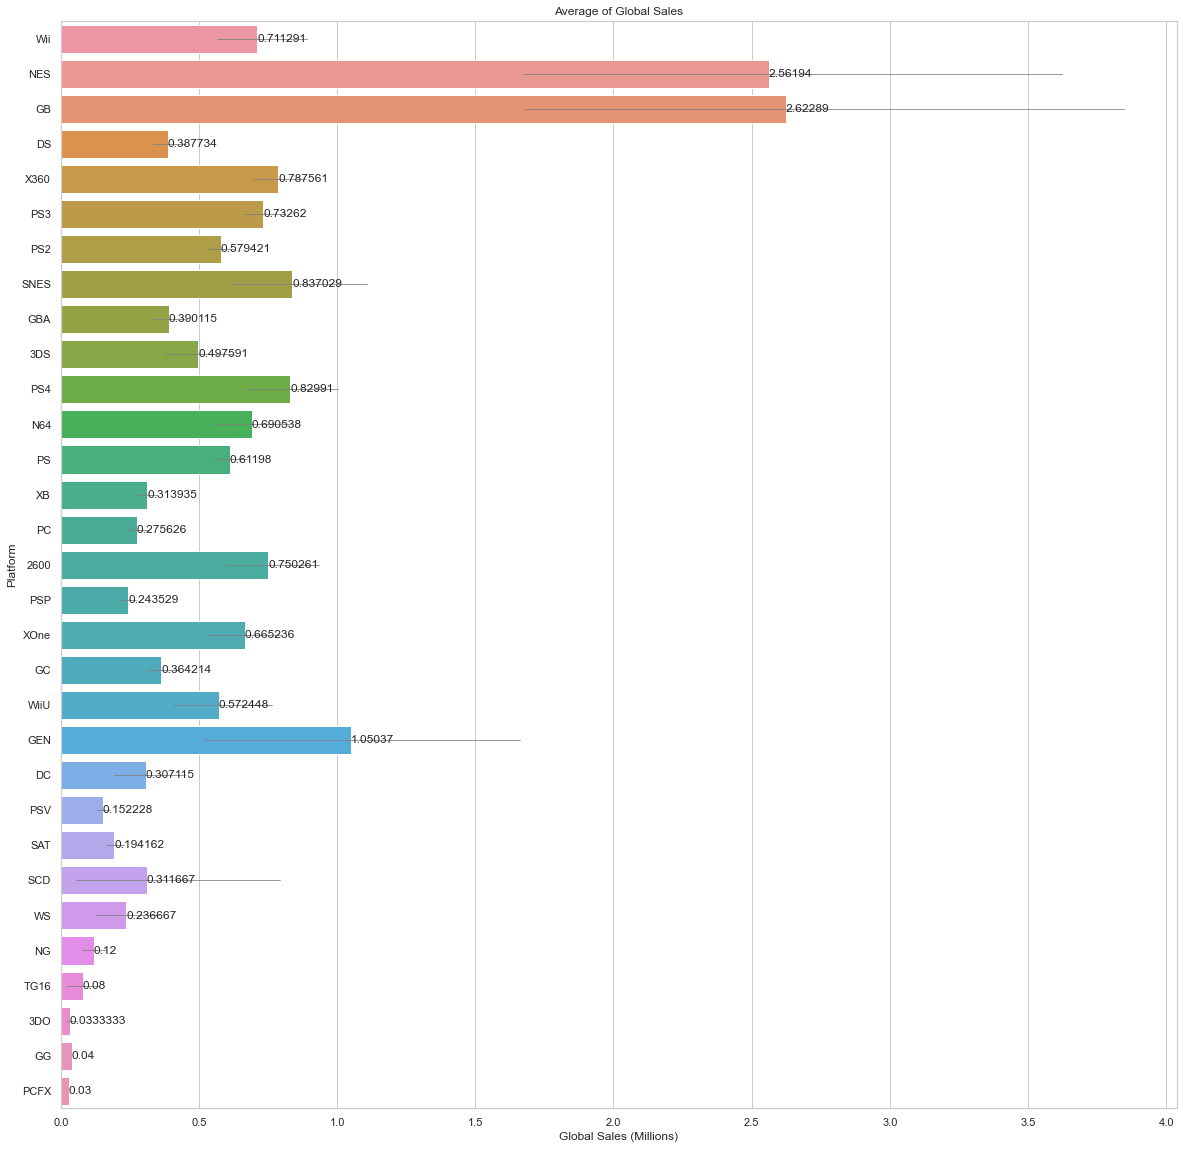

In [133]:
# Wii and some other platforms are prolly bugged?
# Changed Scaling to Hundred Millions for X Label
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,20)) 
ax = sns.barplot(x="Global_Sales",y="Platform",data = games,errcolor="Gray",errwidth = .8)
ax.bar_label(ax.containers[0])
ax.set_xlabel("Global Sales (Millions)")
ax.set_title("Average of Global Sales")

In [124]:
games.groupby("Platform")["Global_Sales"].mean().sort_values(ascending = False)

Platform
GB      2.622887
NES     2.561939
GEN     1.050370
SNES    0.837029
PS4     0.829910
X360    0.787561
2600    0.750261
PS3     0.732620
Wii     0.711291
N64     0.690538
XOne    0.665236
PS      0.611980
PS2     0.579421
WiiU    0.572448
3DS     0.497591
GBA     0.390115
DS      0.387734
GC      0.364214
XB      0.313935
SCD     0.311667
DC      0.307115
PC      0.275626
PSP     0.243529
WS      0.236667
SAT     0.194162
PSV     0.152228
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: Global_Sales, dtype: float64

In [112]:
games.loc[games["Platform"] == "GB"].head()

Rank                                     Name Platform    Year  \
4      5                 Pokemon Red/Pokemon Blue       GB  1996.0   
5      6                                   Tetris       GB  1989.0   
12    13              Pokemon Gold/Pokemon Silver       GB  1999.0   
21    22                         Super Mario Land       GB  1989.0   
30    31  Pokémon Yellow: Special Pikachu Edition       GB  1998.0   

           Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
4   Role-Playing  Nintendo     11.27      8.89     10.22         1.00   
5         Puzzle  Nintendo     23.20      2.26      4.22         0.58   
12  Role-Playing  Nintendo      9.00      6.18      7.20         0.71   
21      Platform  Nintendo     10.83      2.71      4.18         0.42   
30  Role-Playing  Nintendo      5.89      5.04      3.12         0.59   

    Global_Sales  
4          31.37  
5          30.26  
12         23.10  
21         18.14  
30         14.64

#### Average of Sales based on Platform
It appears that the Gameboy has the best average of sales among the games, being able to provide to a large audience with its variety of genres and it being one of the first handheld consoles, allowing people to play it on the go, along with most of its top scoring games either be classics such as Tetris or the famous Pokemon series.

### EDA Question 2

(1980.0, 2020.0)

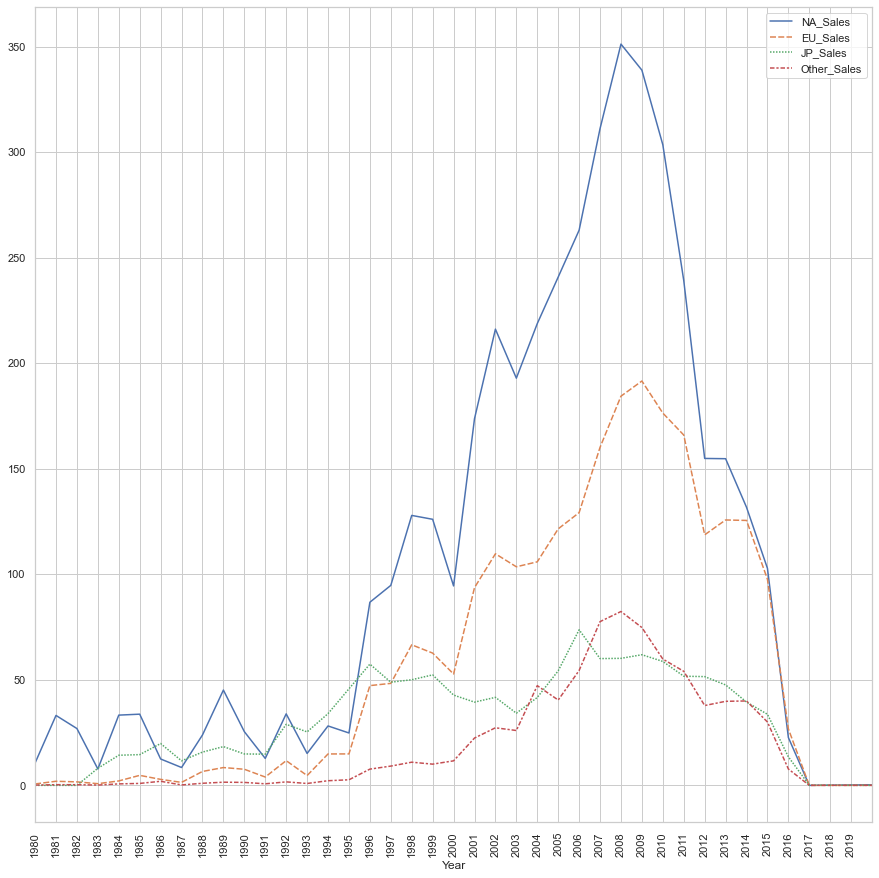

In [204]:
games_temp = games.groupby(["Year"]).sum()
games_temp.drop(columns = ["Global_Sales","Rank"],inplace = True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,15)) 
ax = sns.lineplot(data = games_temp)
ax.set_xticks(range(1980,2020))
plt.xticks(rotation = 90)
ax.set_xlim(1980,2020)

(1980.0, 2020.0)

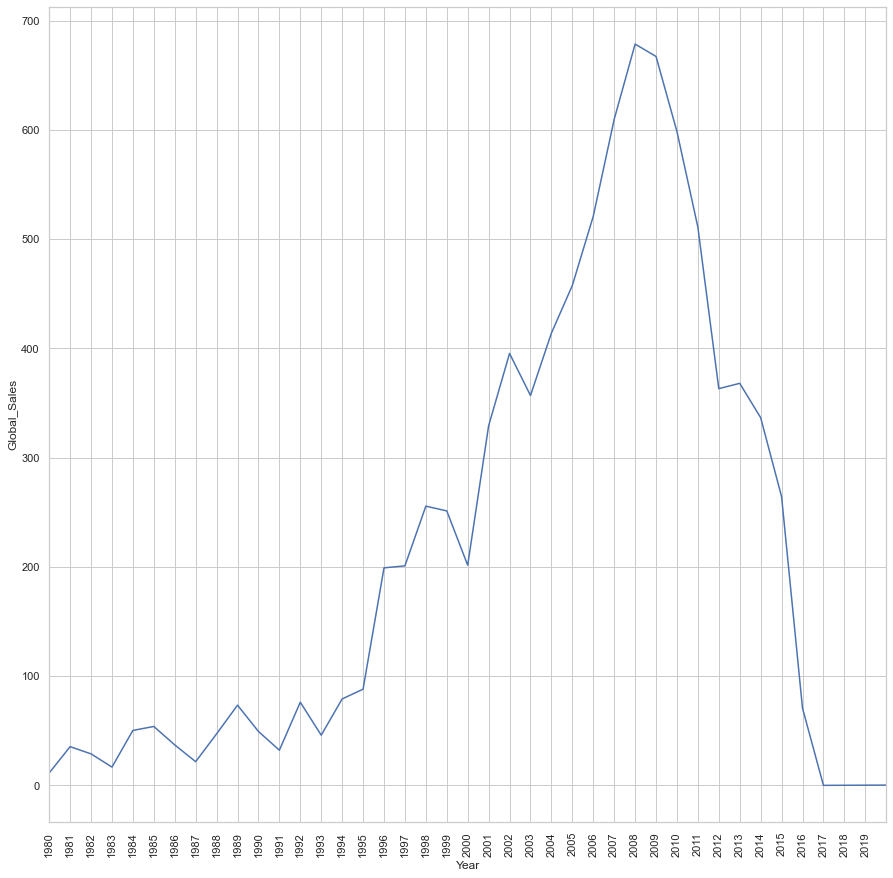

In [192]:
games_temp = games.groupby(["Year"])["Global_Sales"].sum()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,15)) 
ax = sns.lineplot(data = games_temp)
ax.set_xticks(range(1980,2020))
plt.xticks(rotation = 90)
ax.set_xlim(1980,2020)


In [202]:
games.drop(columns = ["Rank"]).groupby(["Year"]).sum()

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                           
1980.0     10.59      0.67      0.00         0.12         11.38
1981.0     33.13      1.94      0.00         0.32         35.48
1982.0     26.92      1.65      0.00         0.31         28.86
1983.0      7.76      0.80      8.10         0.14         16.79
1984.0     33.28      2.10     14.27         0.70         50.36
1985.0     33.73      4.74     14.56         0.92         53.94
1986.0     12.50      2.84     19.81         1.93         37.07
1987.0      8.46      1.41     11.63         0.20         21.74
1988.0     23.87      6.59     15.76         0.99         47.22
1989.0     45.15      8.44     18.36         1.50         73.45
1990.0     25.46      7.63     14.88         1.40         49.39
1991.0     12.76      3.95     14.78         0.74         32.23
1992.0     33.87     11.71     28.91         1.65         76.16
1993.0     15.12      4.65     25.33         0.89         45.98
1994.0     28.15     14.88     33.99         2.20         79.17
1995.0     24.82     14.90     45.75         2.64         88.11
1996.0     86.76     47.26     57.44         7.69        199.15
1997.0     94.75     48.32     48.87         9.13        200.98
1998.0    127.90     66.59     50.04        10.98        255.64
1999.0    126.06     62.67     52.34        10.05        251.27
2000.0     94.49     52.75     42.77        11.62        201.56
2001.0    173.70     93.67     39.44        22.42        329.22
2002.0    216.16    109.72     41.70        27.28        395.42
2003.0    192.92    103.56     34.20        25.99        356.92
2004.0    218.78    105.91     41.65        47.24        413.98
2005.0    240.84    121.53     54.28        40.43        457.62
2006.0    263.04    129.22     73.71        54.43        520.92
2007.0    311.18    160.16     60.06        77.58        609.67
2008.0    351.21    184.40     60.18        82.37        678.58
2009.0    338.85    191.58     61.89        74.77        667.28
2010.0    303.50    176.38     58.72        59.85        598.49
2011.0    239.21    165.98     51.72        54.03        511.01
2012.0    154.89    118.70     51.52        37.82        363.17
2013.0    154.77    125.74     47.59        39.82        368.05
2014.0    131.75    125.52     39.46        39.99        336.65
2015.0    102.82     97.65     33.68        30.01        264.34
2016.0     22.66     26.76     13.51         7.75         70.74
2017.0      0.00      0.00      0.05         0.00          0.05
2020.0      0.27      0.00      0.00         0.02          0.29

#### Analysis
After further research on the spikes, most spikes are generally caused by a platform or a group of platforms that are said to be anticipated in those years. An example is at 2008, the highest peak of the graph, is when the Xbox 360,PS3, and Wii were released. Furthermore, regardless of the impact of North America in the Video Game Industry, aach of the specified regions, follow the trend where spikes are correlated to the release of consoles. This is seen in both regional and global sales.

### Eda Question 3|

In [27]:
#Looking at the summaries for each variable, there are min values for NA_Sales, EU_Sales
games.nunique(axis=0)
games.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16191.000000  16191.000000  16191.000000  16191.000000  16191.000000   
mean    8266.581002   2006.383732      0.266943      0.148414      0.079115   
std     4787.519132      5.833054      0.824741      0.510715      0.312686   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4115.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8260.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12403.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16191.000000  16191.000000  
mean       0.048664      0.543409  
std        0.190624      1.571720  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

In [35]:
OtherSalesMinZeroCount = (games['Other_Sales']== 0).sum()
EUSalesMinZeroCount = (games['EU_Sales']== 0).sum()
JPSalesMinZeroCount = (games['JP_Sales']== 0).sum()

print("Observations with Other_Sales equal to zero: " + str(OtherSalesMinZeroCount))
print("Observations with EU_Sales equal to zero: " + str(EUSalesMinZeroCount))
print("Observations with JP_Sales equal to zero: " + str(JPSalesMinZeroCount))

Observations with Other_Sales equal to zero: 6265
Observations with EU_Sales equal to zero: 5579
Observations with JP_Sales equal to zero: 10137


<AxesSubplot:>

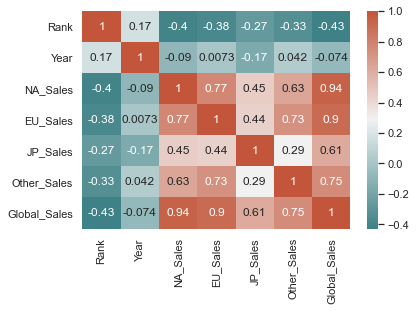

In [37]:
#Correlation matrix
#NOTE: Change this to a sample if needed, although the observations will change.
corr = games.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))


#### Analysis
We can confirm the correlation of each region's sales on the global sales from this but also from the line plots earlier. We see here that NA and EU have a higher positive correlation to Global Sales then JP and the Other regions. This may also be because of how NA and EU represent continents and how large NA's video game industry is. It could be also be due to how JP is a single country and the other Regions don't have as big video game industries.

**Observations:**

- Year is negatively correlated with the Global_Sales, which means that the older the game the more global sales it has.
- Interestingly, the year is possitively correlated with EU_Sales, which means that the newer the game is the more EU_Sales it has.
- The highest correlated variables are NA_Sales and Global_Sales, but EU_Sales and Global_Sales come close.


### Summary

    1. Best performing platform of all time based on global sales
    2. Trend of Global Sales and Regional Sales Throughout the years
    3. Comparing the impact of each region's sales to the global sales

1. The best selling platform is PS2, but it having large variances in the sales, meanwhile Gameboy (GB) has the best average selling games as a platform. The large lead of PS2 in total amount of sales is due to it's large collection of games over the other platforms. Though the PS2 has the most games, not many of its games were considered a "hit" showing a large disparity to its best performing games and least performing games. This may be due to the hype brought by the release many developers tried to develop games for it oversaturating the market for the consumers, causing only the best of the best to stand out from the rest.

2. 

## Research Questions
1. 
2. 

## Statistical Inference
